In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df=pd.read_csv(r'Womens Clothing E-Commerce Reviews.csv')

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
df.shape

(23486, 11)

In [9]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [11]:
df=df.drop(columns=['Title'])

In [12]:
df.isnull().sum()

Unnamed: 0                   0
Clothing ID                  0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [13]:
df=df.dropna(subset=['Review Text'])

In [14]:
df.isnull().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [15]:
for c in ['Division Name','Department Name','Class Name']:
    modeval=df[c].mode()[0]
    df[c].fillna(modeval,inplace=True)

C:\Users\anjan\AppData\Local\Temp\ipykernel_5356\2257491796.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(modeval,inplace=True)


In [16]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [17]:
customer_data=df.groupby('Clothing ID').agg({
    'Rating':'mean', 'Review Text':'count','Division Name':'first'
}).rename(columns={'Review Text':'purchasefreq','Rating':'avg'})

In [18]:
customer_data=pd.get_dummies(customer_data,columns=['Division Name'],drop_first=True)

In [19]:
df.head()

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [20]:
scaler=StandardScaler()

In [21]:
scaled=scaler.fit_transform(customer_data)

In [22]:
kmeans=KMeans(n_clusters=3,random_state=42)
customer_data['Cluster']=kmeans.fit_predict(scaled)

In [23]:
df=df.merge(customer_data['Cluster'],on='Clothing ID',how='left')

In [24]:
customer_data['Cluster'].value_counts()

Cluster
1    513
0    493
2    173
Name: count, dtype: int64

In [25]:
inertias=[]
for k in range(1, 8):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit_predict(scaled)
    inertias.append(kmeans.inertia_)

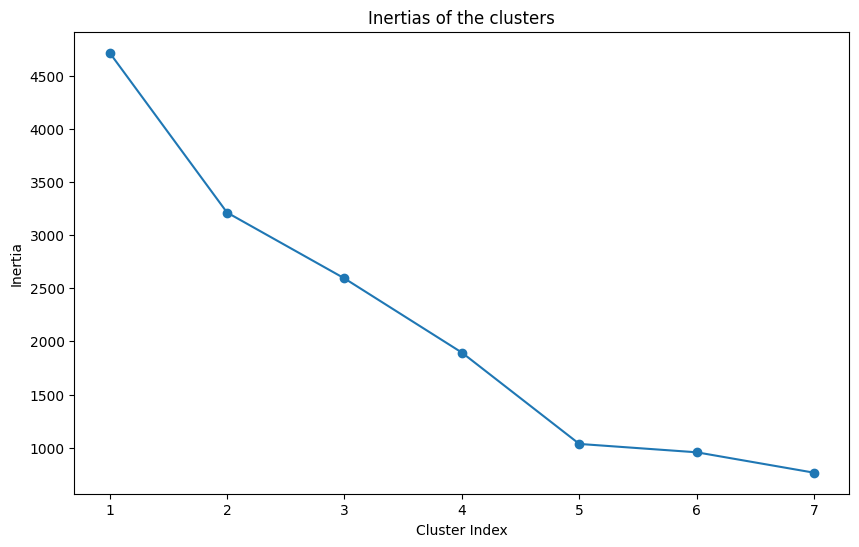

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8),inertias,marker='o')
plt.title('Inertias of the clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Inertia')
plt.show()

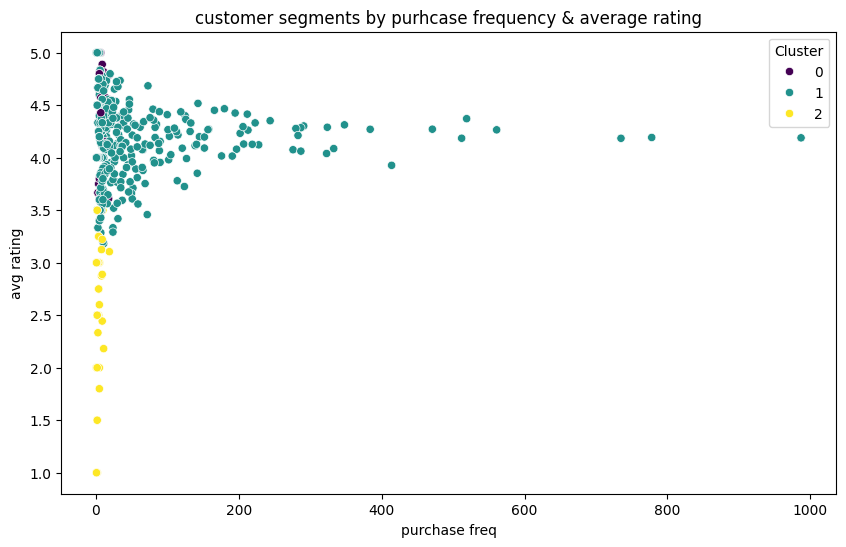

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=customer_data['purchasefreq'],y=customer_data['avg'],hue=customer_data['Cluster'],palette='viridis')
plt.title('customer segments by purhcase frequency & average rating')
plt.xlabel('purchase freq')
plt.ylabel('avg rating')
plt.show()

In [28]:
df.shape

(22641, 11)

In [29]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [30]:
def preprocess_txt(text):
    tokens=word_tokenize(text.lower())
    tokens=[lemmatizer.lemmatize(t) for t in tokens if t.isalnum() and t not in stop_words]
    return ' '.join(tokens)

In [31]:
df['cleaned']=df['Review Text'].apply(preprocess_txt)

In [32]:
df['sentiment']=pd.cut(df['Rating'],bins=[0,2,3,5],labels=['negative','neutral','positive'])

In [33]:
df[['cleaned','sentiment','Rating']].head(20)

,cleaned,sentiment,Rating
0,absolutely wonderful silky sexy comfortable,positive,4
1,love dress sooo pretty happened find store gla...,positive,5
2,high hope dress really wanted work initially o...,neutral,3
3,love love love jumpsuit fun flirty fabulous ev...,positive,5
4,shirt flattering due adjustable front tie perf...,positive,5
5,love tracy reese dress one petite 5 foot tall ...,negative,2
6,aded basket hte last mintue see would look lik...,positive,5
7,ordered carbon store pick ton stuff always try...,positive,4
8,love dress usually get x run little snug bust ...,positive,5
9,5 5 125 lb ordered petite make sure length lon...,positive,5


In [34]:
vectorizer=TfidfVectorizer(max_features=2000)
X=vectorizer.fit_transform(df['cleaned'])
y=df['sentiment']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
model=LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [37]:
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.8211525723117686


C:\Users\anjan\AppData\Local\Temp\ipykernel_5356\2543723729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',data=df,palette='viridis')


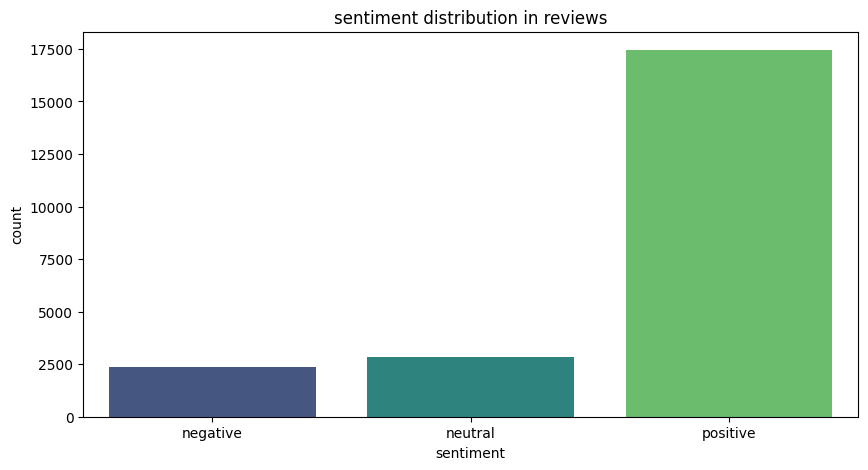

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment',data=df,palette='viridis')
plt.title('sentiment distribution in reviews')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

In [39]:
positive_reviews=' '.join(df[df['sentiment']=='positive']['cleaned'])
wordcloud=WordCloud(width=800,height=400,background_color='white',max_words=100).generate(positive_reviews)

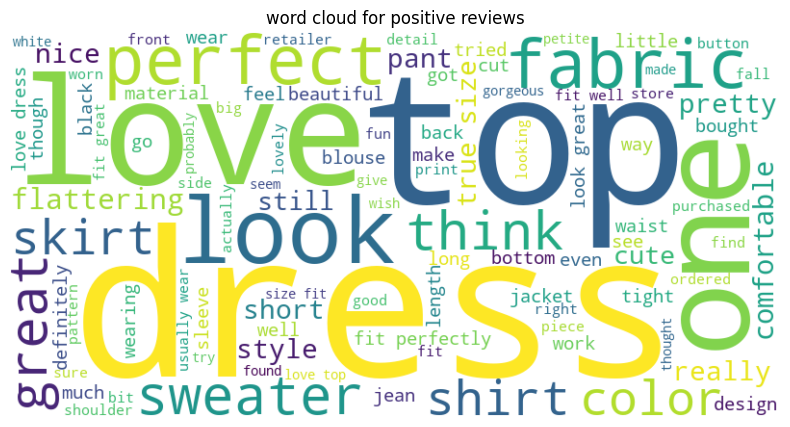

In [40]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('word cloud for positive reviews')
plt.axis('off')
plt.show()

In [41]:
sentiment_by_cluster=df.groupby('Cluster')['sentiment'].value_counts(normalize=True).unstack()
sentiment_by_cluster

sentiment,negative,neutral,positive
Cluster,,,
0,0.035567,0.060380,0.904053
1,0.103465,0.124347,0.772188
2,0.406077,0.359116,0.234807


<Figure size 1000x600 with 0 Axes>

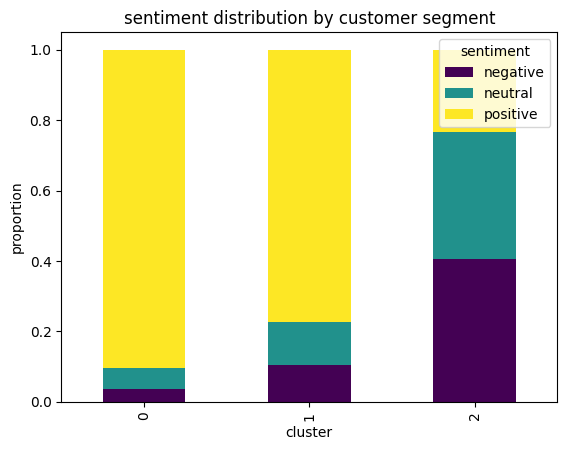

In [42]:
plt.figure(figsize=(10,6))
sentiment_by_cluster.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('sentiment distribution by customer segment')
plt.xlabel('cluster')
plt.ylabel('proportion')
plt.show()

In [43]:
y_test=np.array(y_test)
y_pred=np.array(y_pred)
classes=['negative','positive','neutral']

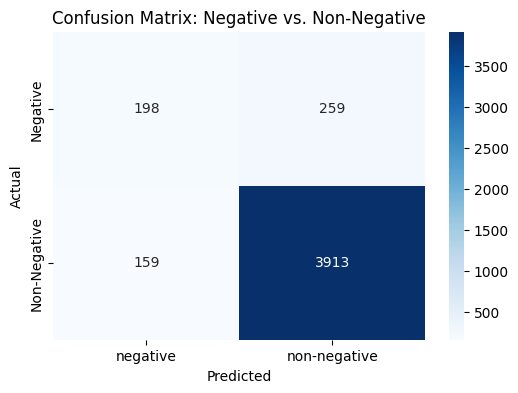

In [44]:
y_test_neg=(y_test=='negative').astype(int)
y_pred_neg=(y_pred=='negative').astype(int)
cm_neg=confusion_matrix(y_test_neg,y_pred_neg,labels=[1,0])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_neg, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'non-negative'], yticklabels=['Negative', 'Non-Negative'])
plt.title('Confusion Matrix: Negative vs. Non-Negative')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

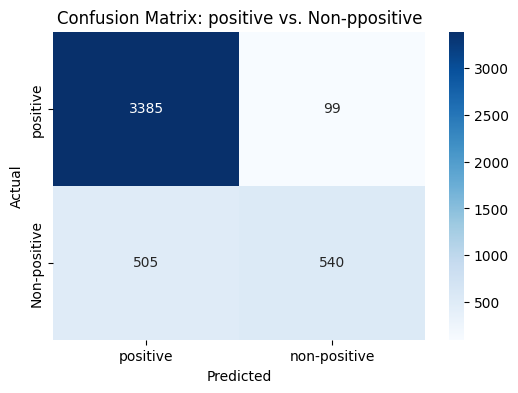

In [45]:
y_test_pos=(y_test=='positive').astype(int)
y_pred_pos=(y_pred=='positive').astype(int)
cm_pos=confusion_matrix(y_test_pos,y_pred_pos,labels=[1,0])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_pos, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'non-positive'], yticklabels=['positive', 'Non-positive'])
plt.title('Confusion Matrix: positive vs. Non-ppositive')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

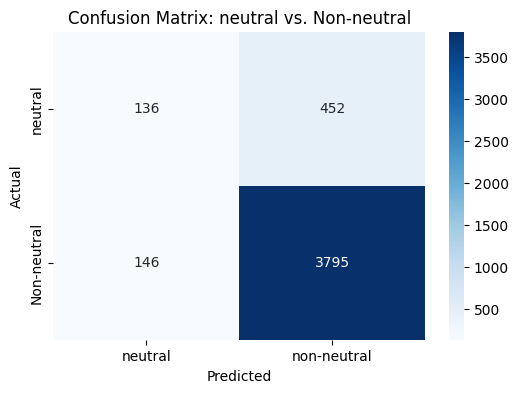

In [46]:
y_test_neu=(y_test=='neutral').astype(int)
y_pred_neu=(y_pred=='neutral').astype(int)
cm_neu=confusion_matrix(y_test_neu,y_pred_neu,labels=[1,0])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_neu, annot=True, fmt='d', cmap='Blues', xticklabels=['neutral', 'non-neutral'], yticklabels=['neutral', 'Non-neutral'])
plt.title('Confusion Matrix: neutral vs. Non-neutral')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()